In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#1.    Melakukan persiapan data (data preparataion):

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")

Using Colab cache for faster access to the 'top-spotify-songs-2023' dataset.


In [7]:
#filepath of the dataset
filepath = '/kaggle/input/top-spotify-songs-2023/spotify-2023.csv'

#load the spotify dataset
df = pd.read_csv(filepath, encoding = 'latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [8]:
#Pengeecekan data yang memiliki duplikasi
df.duplicated().sum()

np.int64(0)

In [9]:
# Hapus kolom yang tidak diperlukan
cols_to_drop = ["in_apple_playlists", "in_apple_charts", "in_deezer_playlists", "in_deezer_charts", "in_shazam_charts" ]
df = df.drop(columns=cols_to_drop, errors="ignore")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,97,C#,Major,82,67,77,8,0,12,5


In [10]:
#Pengencekan data yang memiliki missing value
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
bpm,0


In [11]:
# Hapus kolom yang memiliki missing value
df = df.dropna()

In [12]:
df_features = df
df= pd.get_dummies(df, columns=['key', 'mode'], prefix=['key', 'mode'])

# 2. Eksplorasi awal dataset (EDA singkat):

In [13]:
# Tampilkan semua nilai yang mengandung huruf (A–Z) atau simbol selain angka/koma/titik)
mask_non_numeric = df['streams'].astype(str).str.contains(r'[A-Za-z]', regex=True)

# Lihat hasilnya
weird_streams = df[mask_non_numeric]['streams']
print("Jumlah nilai tidak numerik:", len(weird_streams))
display(weird_streams)


Jumlah nilai tidak numerik: 1


,streams
574,BPM110KeyAModeMajorDanceability53Valence75Ener...


In [14]:
# Hapus baris yang kolom 'streams'-nya mengandung huruf (berarti tidak murni angka)
df = df[~df['streams'].astype(str).str.contains(r'[A-Za-z]', regex=True)]

# Pastikan hanya angka yang tersisa
print(df['streams'].head(10))

# Cek total data setelah penghapusan
print(f"Jumlah data setelah pembersihan: {len(df)}")


0    141381703
1    133716286
2    140003974
3    800840817
4    303236322
5    183706234
6    725980112
7     58149378
8     95217315
9    553634067
Name: streams, dtype: object
Jumlah data setelah pembersihan: 857


In [15]:
# Hapus karakter non-angka pada kolom 'streams' (seperti koma atau titik)
df['streams'] = df['streams'].replace({',': '', '\.': ''}, regex=True)

# Konversi ke integer
df['streams'] = df['streams'].astype(int)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2072144707.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['streams'] = df['streams'].replace({',': '', '\.': ''}, regex=True)


In [16]:
#Jumlah dan deskripsi kolom dan data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            857 non-null    object
 1   artist(s)_name        857 non-null    object
 2   artist_count          857 non-null    int64 
 3   released_year         857 non-null    int64 
 4   released_month        857 non-null    int64 
 5   released_day          857 non-null    int64 
 6   in_spotify_playlists  857 non-null    int64 
 7   in_spotify_charts     857 non-null    int64 
 8   streams               857 non-null    int64 
 9   bpm                   857 non-null    int64 
 10  danceability_%        857 non-null    int64 
 11  valence_%             857 non-null    int64 
 12  energy_%              857 non-null    int64 
 13  acousticness_%        857 non-null    int64 
 14  instrumentalness_%    857 non-null    int64 
 15  liveness_%            857 non-null    int64 


In [17]:
#Statistik deskriptif (mean, median, std, count)
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,8.570000e+02,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,1.551925,2018.297550,6.031505,13.739790,5204.997666,11.959160,5.133554e+08,122.842474,67.273046,51.219370,64.339557,26.644107,1.611435,18.175029,10.396733
std,0.864634,10.991135,3.567138,9.287652,7944.032885,19.194211,5.714855e+08,28.196567,14.653159,23.594579,16.056348,25.688111,8.570734,13.569471,10.090890
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,5.000000,859.000000,0.000000,1.391938e+08,100.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2226.000000,3.000000,2.849083e+08,121.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,142.000000,78.000000,70.000000,76.000000,42.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


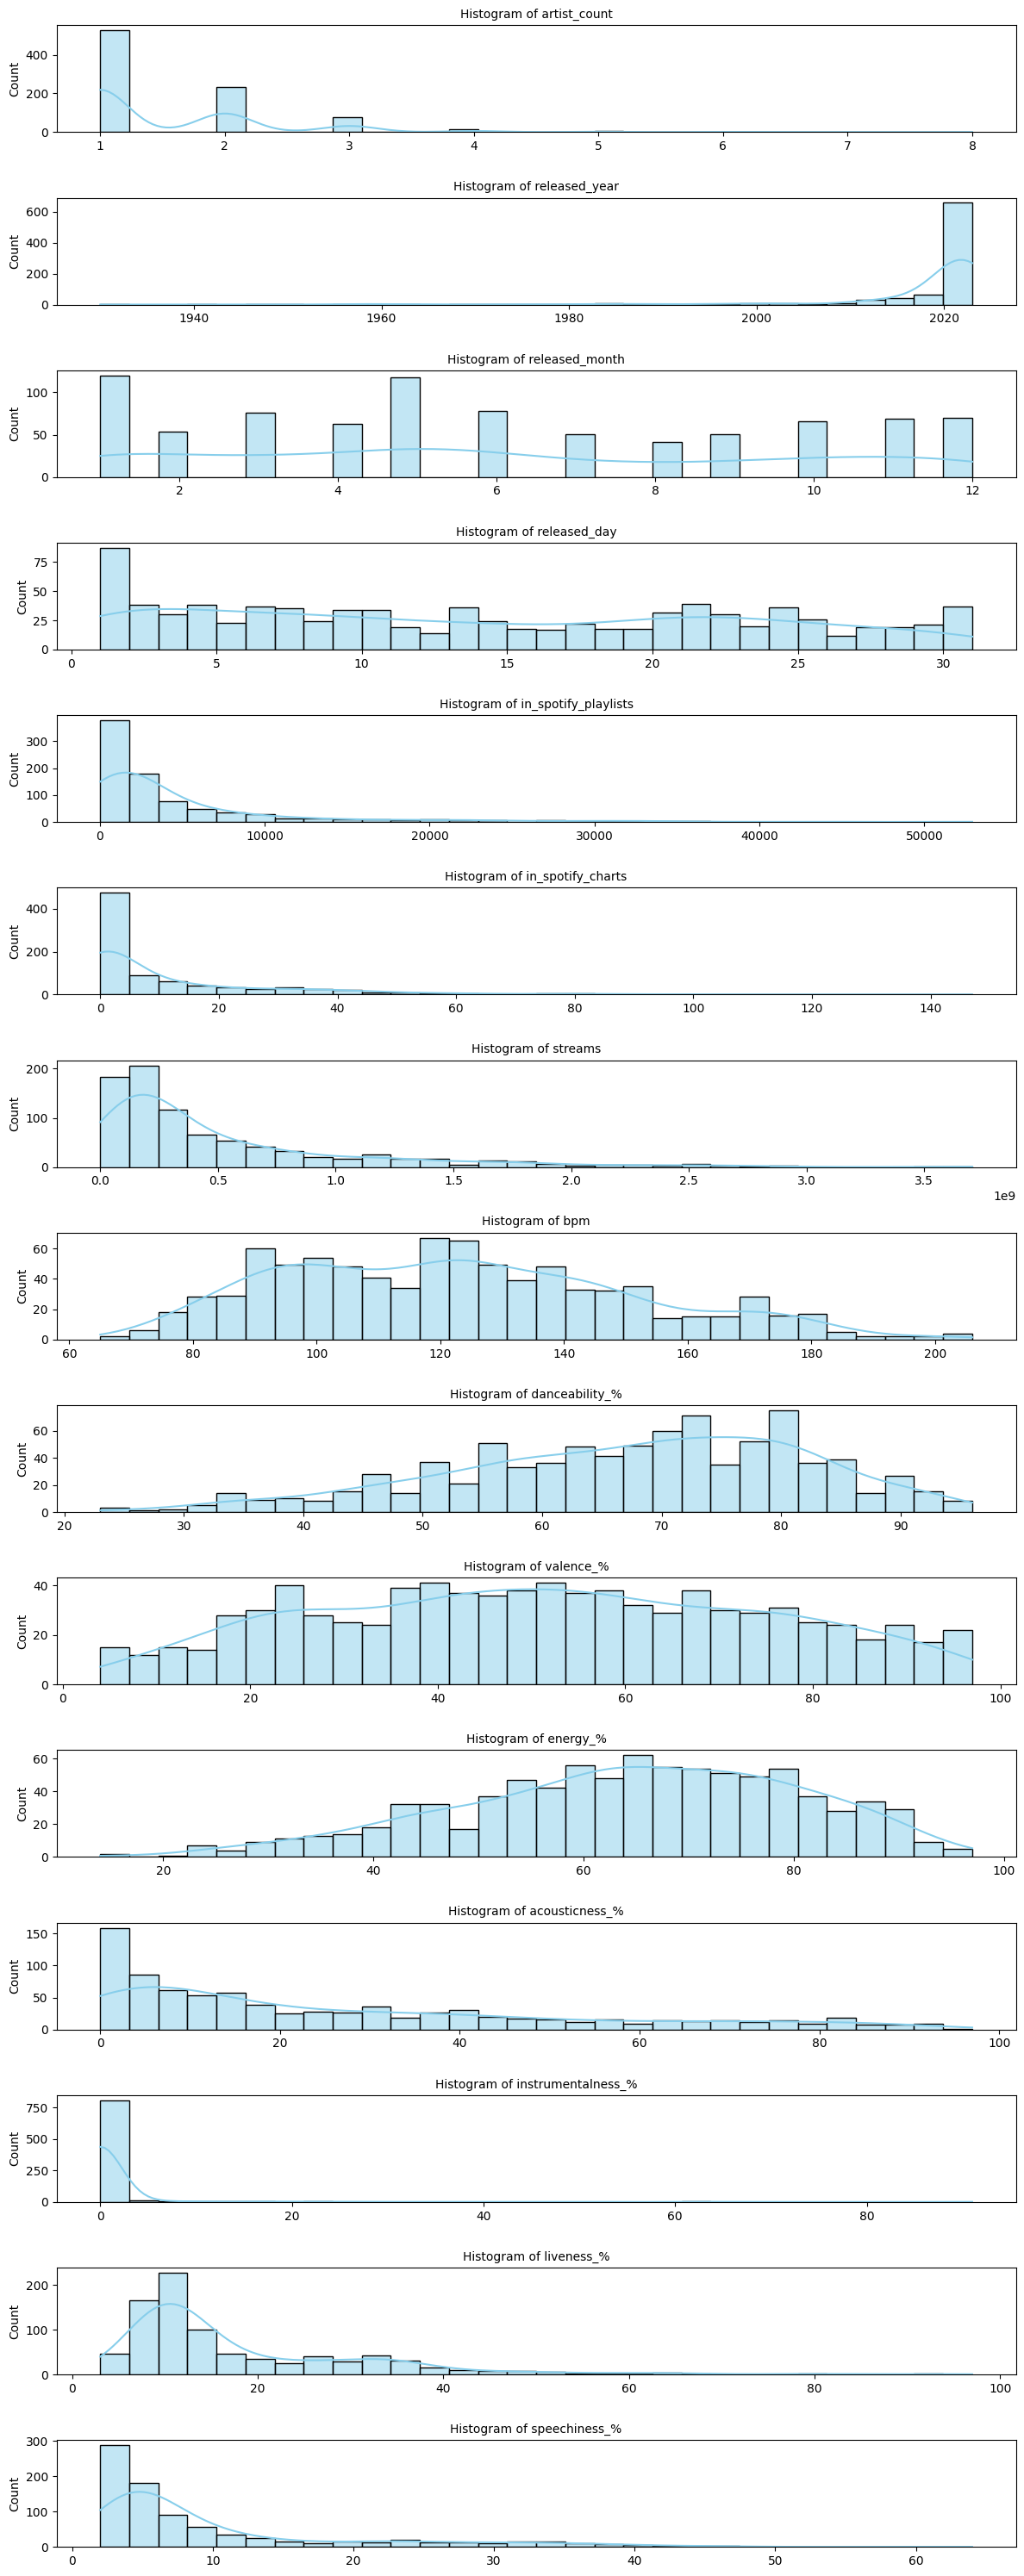

In [18]:
#Mengelompokkan data numerik
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# ---- 1️⃣ Histogram untuk melihat distribusi setiap kolom numerik ----
plt.figure(figsize=(12, len(numeric_cols) * 2))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {col}", fontsize=10)
    plt.xlabel("")
plt.tight_layout()
plt.show()

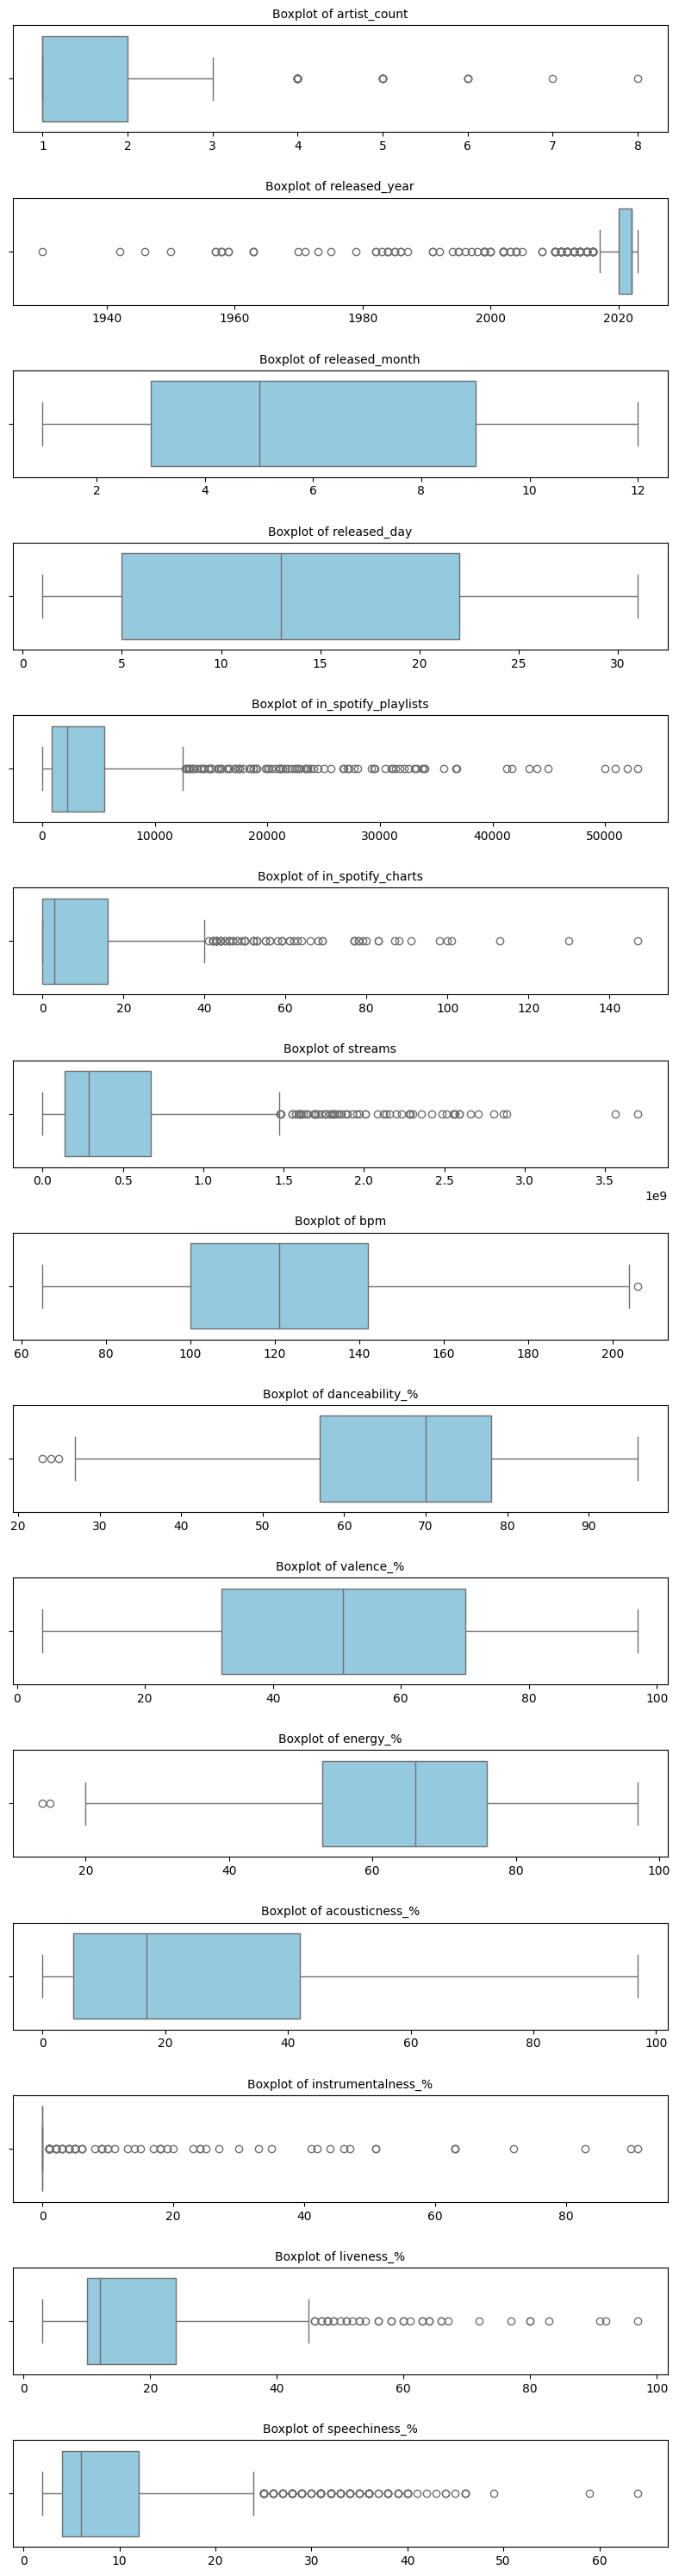

In [19]:
# ---- 2️⃣ Boxplot untuk melihat outlier ----
plt.figure(figsize=(8, len(numeric_cols) * 2))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}", fontsize=10)
    plt.xlabel("")
plt.tight_layout()
plt.show()

# 3. Menggunakan Python untuk analisis dan visualisasi

In [20]:
# 1. Siapa artis dengan jumlah lagu terbanyak dalam daftar Most Streamed Spotify Songs 2023?
artist_count = df['artist(s)_name'].value_counts().head(10).reset_index()
artist_count.columns = ['artist(s)_name', 'Number of Songs']

# Buat grafik interaktif
fig = px.bar(
    artist_count,
    x='Number of Songs',
    y='artist(s)_name',
    orientation='h',
    color='Number of Songs',
    color_continuous_scale='viridis',
    title='Top 10 Artists with Most Songs in Spotify 2023 Chart',
    text='Number of Songs'
)

# Atur tampilan dan warna background menjadi putih
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Number of Songs',
    yaxis_title='Artist',
    yaxis=dict(autorange='reversed'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    title_font=dict(size=18, family='Arial Black'),
)

fig.show()

In [21]:
# Ambil 10 lagu dengan jumlah streaming tertinggi
top10 = df.nlargest(10, 'streams').sort_values('streams', ascending=False)

# Buat grafik interaktif
fig = px.bar(
    top10,
    x='streams',
    y='track_name',
    color='streams',
    orientation='h',
    text='streams',
    color_continuous_scale='viridis',
    title='Top 10 Most Streamed Songs 2023'
)

fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_font=dict(size=18, family='Arial Black'),
)

fig.show()


In [50]:
# Ambil 10 artis dengan total streams terbanyak
top_10_artistas = (
    df.groupby('artist(s)_name', as_index=False)['streams']
    .sum()
    .sort_values(by='streams', ascending=False)
    .head(10)
)

# Buat grafik interaktif (gaya mirip grafik Top 10 Songs)
fig = px.bar(
    top_10_artistas,
    x='streams',
    y='artist(s)_name',
    color='streams',
    orientation='h',
    text='streams',
    color_continuous_scale='viridis',
    title='Top 10 Artists with the Most Total Streams (2023)'
)

# Layout mirip gaya sebelumnya
fig.update_traces(
    texttemplate='%{text:,}',
    textposition='outside'
)

fig.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis_title='Total Streams',
    yaxis_title='Artist',
    coloraxis_showscale=True,
    title_font=dict(size=18, family='Arial Black'),
    font=dict(size=12, family='Arial', color='black'),
    margin=dict(l=100, r=40, t=60, b=40)
)

fig.show()


streams               1.000000
acousticness_%        0.010798
bpm                  -0.002163
energy_%             -0.029714
valence_%            -0.042787
instrumentalness_%   -0.043068
liveness_%           -0.054275
danceability_%       -0.100702
speechiness_%        -0.112896
Name: streams, dtype: float64


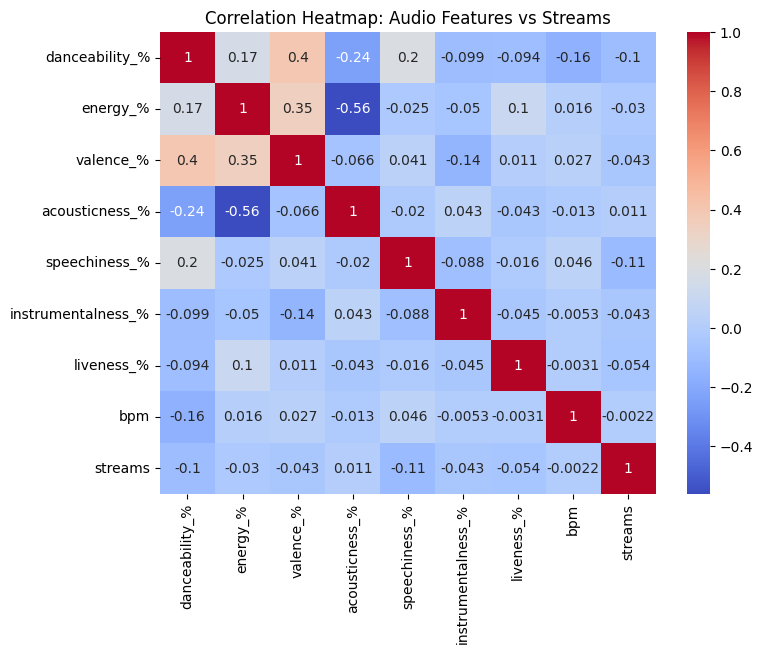

In [23]:
#. Atribut musik apa yang paling berpengaruh terhadap popularitas lagu di Spotify?
features = ["danceability_%", "energy_%", "valence_%", "acousticness_%",
            "speechiness_%", "instrumentalness_%", "liveness_%", "bpm"]

corr = df[features + ["streams"]].corr()["streams"].sort_values(ascending=False)
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(df[features + ["streams"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Audio Features vs Streams")
plt.show()

In [24]:
#5. Apakah lagu yang muncul di lebih banyak playlist cenderung memiliki jumlah streaming lebih tinggi?
# Buat grafik scatter interaktif
fig = px.scatter(
    df,
    x="in_spotify_playlists",
    y="streams",
    color="streams",
    size="streams",
    hover_name="track_name",
    hover_data=["artist(s)_name"],
    color_continuous_scale="viridis",
    title="Relationship Between Playlist Count and Streams",
    labels={
        "in_spotify_playlists": "Number of Playlists",
        "streams": "Streams (Billions)"
    }
)

# Ubah tampilan layout agar lebih bersih
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    title_font=dict(size=18, family='Arial Black')
)

# Tampilkan grafik
fig.show()

# 4. Membuat visualisasi sesuai tujuan analisis

Menentukan karakteristik lagu yang paling diminati pengguna Spotify.

In [25]:
top_10_songs = df.nlargest(10, 'streams')
top_50_songs = df.nlargest(50, 'streams')
top_100_songs = df.nlargest(100, 'streams')
top_200_songs = df.nlargest(200, 'streams')
top_500_songs = df.nlargest(500, 'streams')
top_700_songs = df.nlargest(700, 'streams')
top_817_songs = df.nlargest(817, 'streams')

last_10_songs = df.nsmallest(10, 'streams')
last_50_songs = df.nsmallest(50, 'streams')
last_100_songs = df.nsmallest(100, 'streams')
last_200_songs = df.nsmallest(200, 'streams')
last_500_songs = df.nsmallest(500, 'streams')

In [26]:
key_colors = {
    'key_A': 'red',
    'key_A#': 'blue',
    'key_B': 'green',
    'key_C#': 'purple',
    'key_D': 'orange',
    'key_D#': 'cyan',
    'key_E': 'magenta',
    'key_F': 'yellow',
    'key_F#': 'lime',
    'key_G': 'pink',
    'key_G#': 'brown'
}

key_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#']

In [44]:
#Penyebaran keys di semua lagu
# Hitung jumlah key
key_df = df[key_columns]
key_counts = key_df.eq(1).sum()

# Siapkan data untuk Plotly
plot_df = key_counts.reset_index()
plot_df.columns = ["key", "count"]

# Ambil warna sesuai key
plot_df["color"] = plot_df["key"].map(key_colors)

# Buat pie chart interaktif
fig = px.pie(
    plot_df,
    names="key",
    values="count",
    title="Overall Keys Distribution",
    color="key",
    color_discrete_map=key_colors,
    hole=0
)

fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Total: %{value}<br>Persen: %{percent}"
)

fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    title_font=dict(size=18, family='Arial Black')
)

fig.show()


In [56]:
#Penyebaran keys di top 10, top 50, dan top 100
# Siapkan subplot interaktif
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
    subplot_titles=chart_titles
)

for i, (df_temp, title) in enumerate(zip(dataframes, chart_titles)):
    key_df = df_temp[key_columns]
    key_counts = key_df.eq(1).sum()

    # Hanya ambil key yang muncul
    key_counts_filtered = key_counts[key_counts > 0]

    fig.add_trace(
        go.Pie(
            labels=key_counts_filtered.index,
            values=key_counts_filtered.values,
            name=title,
            marker=dict(colors=[key_colors[k] for k in key_counts_filtered.index]),
            hovertemplate="<b>%{label}</b><br>Total: %{value}<br>Persen: %{percent}"
        ),
        row=1, col=i+1
    )

# Judul utama
fig.update_layout(
    title_text="Keys Distribution Comparison",
    legend_title="Keys",
    width=1200,
    height=500,
    title_font=dict(size=18, family='Arial Black')
)

fig.show()

In [55]:
#Mengecek distribusi mode
labels = ['Top 10', 'Top 50', 'Top 100']
x = np.arange(len(labels))

major_counts = counts_1['mode_Major']
minor_counts = counts_1['mode_Minor']

# Grafik interaktif
fig = go.Figure()

# Mode Major
fig.add_trace(go.Bar(
    x=labels,
    y=major_counts,
    name="Mode Major",
    marker_color="skyblue",
    text=major_counts,
    textposition="outside",
    hovertemplate="Subset: %{x}<br>Major: %{y}"
))

# Mode Minor
fig.add_trace(go.Bar(
    x=labels,
    y=minor_counts,
    name="Mode Minor",
    marker_color="lightcoral",
    text=minor_counts,
    textposition="outside",
    hovertemplate="Subset: %{x}<br>Minor: %{y}"
))

# Layout
fig.update_layout(
    title="Distribustion of Mode Major and Minor",
    xaxis_title="Subset of Songs",
    yaxis_title="Count",
    barmode="group",
    bargap=0.25,
    bargroupgap=0.1,
    width=1000,
    height=500,
    legend_title="Mode",
    title_font=dict(size=18, family='Arial Black')
)

fig.show()

In [54]:
#Mengecek distribusi BPM dan melihat rata" BPM top 10
fig = go.Figure()

bpm_avg = []

for i, df_temp in enumerate(dataframes):

    # custom data: track name + artist
    custom_data = np.stack([
        df_temp['track_name'],
        df_temp['artist(s)_name']
    ], axis=-1)

    fig.add_trace(go.Scatter(
        x=[labels[i]] * len(df_temp),
        y=df_temp['bpm'],
        mode="markers",
        name=f"{labels[i]} BPM",
        opacity=0.7,
        customdata=custom_data,
        hovertemplate=(
            "<b>%{customdata[0]}</b><br>"
            "Artist: %{customdata[1]}<br>"
            "Subset: %{x}<br>"
            "BPM: %{y}<extra></extra>"
        )
    ))

    bpm_avg.append(df_temp['bpm'].mean())

# Garis rata-rata
fig.add_trace(go.Scatter(
    x=labels,
    y=bpm_avg,
    mode='lines+markers',
    line=dict(color='red'),
    name='Average BPM',
    hovertemplate="Rata-rata BPM: %{y}<extra></extra>"
))

fig.update_layout(
    title="Distribution of BPM for Each Subset (Interactive)",
    xaxis_title="Subset of Songs",
    yaxis_title="BPM",
    width=1100,
    height=550,
    xaxis=dict(tickmode='array', tickvals=labels),
    title_font=dict(size=18, family='Arial Black')
)

fig.show()



In [68]:
#Mengecek distribusi rata" danceability
# Dataframe yang dipakai
dataframes = [df, top_100_songs, top_50_songs, top_10_songs]
labels = ["All Songs", "Top 100", "Top 50", "Top 10"]

danceability_min = []
danceability_max = []
danceability_avg = []

# Hitung nilai untuk setiap subset
for d in dataframes:
    danceability_min.append(d['danceability_%'].min())
    danceability_max.append(d['danceability_%'].max())
    danceability_avg.append(d['danceability_%'].mean())

fig = go.Figure()

# Max
fig.add_trace(go.Scatter(
    x=labels,
    y=danceability_max,
    mode='lines+markers',
    name='Max Danceability',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Max: %{y:.2f}<extra></extra>"
))

# Average
fig.add_trace(go.Scatter(
    x=labels,
    y=danceability_avg,
    mode='lines+markers',
    name='Average Danceability',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Avg: %{y:.2f}<extra></extra>"
))

# Min
fig.add_trace(go.Scatter(
    x=labels,
    y=danceability_min,
    mode='lines+markers',
    name='Min Danceability',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Min: %{y:.2f}<extra></extra>"
))

fig.update_layout(
    title="Distribution of Danceability – All, Top 100, Top 50, Top 10",
    xaxis_title="Subset of Songs",
    yaxis_title="Danceability",
    width=1100,
    height=550,
    legend_title="Metrics",
    hovermode="x unified",
    title_font=dict(size=18, family='Arial Black')
)

fig.show()

In [69]:
#Mengecek distribusi rata" valence
# Dataframe yang dipakai
dataframes = [df, top_100_songs, top_50_songs, top_10_songs]
labels = ["All Songs", "Top 100", "Top 50", "Top 10"]

valence_min = []
valence_max = []
valence_avg = []

# Hitung nilai untuk setiap subset
for d in dataframes:
    valence_min.append(d['valence_%'].min())
    valence_max.append(d['valence_%'].max())
    valence_avg.append(d['valence_%'].mean())

fig = go.Figure()

# Max
fig.add_trace(go.Scatter(
    x=labels,
    y=valence_max,
    mode='lines+markers',
    name='Max Valence',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Max: %{y:.2f}<extra></extra>"
))

# Average
fig.add_trace(go.Scatter(
    x=labels,
    y=valence_avg,
    mode='lines+markers',
    name='Average Valence',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Avg: %{y:.2f}<extra></extra>"
))

# Min
fig.add_trace(go.Scatter(
    x=labels,
    y=valence_min,
    mode='lines+markers',
    name='Min Valence',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Min: %{y:.2f}<extra></extra>"
))

fig.update_layout(
    title="Distribution of Valence – All, Top 100, Top 50, Top 10",
    xaxis_title="Subset of Songs",
    yaxis_title="Valence",
    width=1100,
    height=550,
    legend_title="Metrics",
    hovermode="x unified",
    title_font=dict(size=18, family='Arial Black')
)

fig.show()


In [70]:
# Mengecek distribusi rata" energy
# Dataframe yang dipakai
dataframes = [df, top_100_songs, top_50_songs, top_10_songs]
labels = ["All Songs", "Top 100", "Top 50", "Top 10"]

energy_min = []
energy_max = []
energy_avg = []

# Hitung nilai untuk setiap subset
for d in dataframes:
    energy_min.append(d['energy_%'].min())
    energy_max.append(d['energy_%'].max())
    energy_avg.append(d['energy_%'].mean())

fig = go.Figure()

# Max
fig.add_trace(go.Scatter(
    x=labels,
    y=energy_max,
    mode='lines+markers',
    name='Max Energy',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Max: %{y:.2f}<extra></extra>"
))

# Average
fig.add_trace(go.Scatter(
    x=labels,
    y=energy_avg,
    mode='lines+markers',
    name='Average Energy',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Avg: %{y:.2f}<extra></extra>"
))

# Min
fig.add_trace(go.Scatter(
    x=labels,
    y=energy_min,
    mode='lines+markers',
    name='Min Energy',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Min: %{y:.2f}<extra></extra>"
))

fig.update_layout(
    title="Distribution of Energy – All, Top 100, Top 50, Top 10",
    xaxis_title="Subset of Songs",
    yaxis_title="Energy",
    width=1100,
    height=550,
    legend_title="Metrics",
    hovermode="x unified",
    title_font=dict(size=18, family='Arial Black')
)

fig.show()


In [71]:
# Mengecek distribusi rata" acousticness
# Dataframe yang dipakai
dataframes = [df, top_100_songs, top_50_songs, top_10_songs]
labels = ["All Songs", "Top 100", "Top 50", "Top 10"]

ac_min = []
ac_max = []
ac_avg = []

# Hitung nilai untuk setiap subset
for d in dataframes:
    ac_min.append(d['acousticness_%'].min())
    ac_max.append(d['acousticness_%'].max())
    ac_avg.append(d['acousticness_%'].mean())

fig = go.Figure()

# Max
fig.add_trace(go.Scatter(
    x=labels,
    y=ac_max,
    mode='lines+markers',
    name='Max Acousticness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Max: %{y:.2f}<extra></extra>"
))

# Average
fig.add_trace(go.Scatter(
    x=labels,
    y=ac_avg,
    mode='lines+markers',
    name='Average Acousticness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Avg: %{y:.2f}<extra></extra>"
))

# Min
fig.add_trace(go.Scatter(
    x=labels,
    y=ac_min,
    mode='lines+markers',
    name='Min Acousticness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Min: %{y:.2f}<extra></extra>"
))

fig.update_layout(
    title="Distribution of Acousticness – All, Top 100, Top 50, Top 10",
    xaxis_title="Subset of Songs",
    yaxis_title="Acousticness",
    width=1100,
    height=550,
    legend_title="Metrics",
    hovermode="x unified",
    title_font=dict(size=18, family='Arial Black')
)

fig.show()



In [72]:
# Mengecek distribusi rata" instrumentalness
# Dataframe yang dipakai
dataframes = [df, top_100_songs, top_50_songs, top_10_songs]
labels = ["All Songs", "Top 100", "Top 50", "Top 10"]

ins_min = []
ins_max = []
ins_avg = []

# Hitung nilai untuk setiap subset
for d in dataframes:
    ins_min.append(d['instrumentalness_%'].min())
    ins_max.append(d['instrumentalness_%'].max())
    ins_avg.append(d['instrumentalness_%'].mean())

fig = go.Figure()

# Max
fig.add_trace(go.Scatter(
    x=labels,
    y=ins_max,
    mode='lines+markers',
    name='Max Instrumentalness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Max: %{y:.6f}<extra></extra>"
))

# Average
fig.add_trace(go.Scatter(
    x=labels,
    y=ins_avg,
    mode='lines+markers',
    name='Average Instrumentalness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Avg: %{y:.6f}<extra></extra>"
))

# Min
fig.add_trace(go.Scatter(
    x=labels,
    y=ins_min,
    mode='lines+markers',
    name='Min Instrumentalness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Min: %{y:.6f}<extra></extra>"
))

fig.update_layout(
    title="Distribution of Instrumentalness – All, Top 100, Top 50, Top 10",
    xaxis_title="Subset of Songs",
    yaxis_title="Instrumentalness",
    width=1100,
    height=550,
    legend_title="Metrics",
    hovermode="x unified",
    title_font=dict(size=18, family='Arial Black')
)

fig.show()


In [73]:
# Mengecek distribusi rata" liveness
# Dataframe yang dipakai
dataframes = [df, top_100_songs, top_50_songs, top_10_songs]
labels = ["All Songs", "Top 100", "Top 50", "Top 10"]

liveness_min = []
liveness_max = []
liveness_avg = []

# Hitung nilai untuk setiap subset
for d in dataframes:
    liveness_min.append(d['liveness_%'].min())
    liveness_max.append(d['liveness_%'].max())
    liveness_avg.append(d['liveness_%'].mean())

fig = go.Figure()

# Max
fig.add_trace(go.Scatter(
    x=labels,
    y=liveness_max,
    mode='lines+markers',
    name='Max Liveness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Max: %{y:.3f}<extra></extra>"
))

# Average
fig.add_trace(go.Scatter(
    x=labels,
    y=liveness_avg,
    mode='lines+markers',
    name='Average Liveness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Avg: %{y:.3f}<extra></extra>"
))

# Min
fig.add_trace(go.Scatter(
    x=labels,
    y=liveness_min,
    mode='lines+markers',
    name='Min Liveness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Min: %{y:.3f}<extra></extra>"
))

fig.update_layout(
    title="Distribution of Liveness – All, Top 100, Top 50, Top 10",
    xaxis_title="Subset of Songs",
    yaxis_title="Liveness",
    width=1100,
    height=550,
    legend_title="Metrics",
    hovermode="x unified",
    title_font=dict(size=18, family='Arial Black')
)

fig.show()


In [74]:
# Mengecek distribusi rata" speechiness
# Dataframe yang dipakai
dataframes = [df, top_100_songs, top_50_songs, top_10_songs]
labels = ["All Songs", "Top 100", "Top 50", "Top 10"]

speechiness_min = []
speechiness_max = []
speechiness_avg = []

# Hitung nilai untuk setiap subset
for d in dataframes:
    speechiness_min.append(d['speechiness_%'].min())
    speechiness_max.append(d['speechiness_%'].max())
    speechiness_avg.append(d['speechiness_%'].mean())

fig = go.Figure()

# Max
fig.add_trace(go.Scatter(
    x=labels,
    y=speechiness_max,
    mode='lines+markers',
    name='Max Speechiness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Max: %{y:.3f}<extra></extra>"
))

# Average
fig.add_trace(go.Scatter(
    x=labels,
    y=speechiness_avg,
    mode='lines+markers',
    name='Average Speechiness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Avg: %{y:.3f}<extra></extra>"
))

# Min
fig.add_trace(go.Scatter(
    x=labels,
    y=speechiness_min,
    mode='lines+markers',
    name='Min Speechiness',
    marker=dict(size=8),
    hovertemplate="Subset: %{x}<br>Min: %{y:.3f}<extra></extra>"
))

fig.update_layout(
    title="Distribution of Speechiness – All, Top 100, Top 50, Top 10",
    xaxis_title="Subset of Songs",
    yaxis_title="Speechiness",
    width=1100,
    height=550,
    legend_title="Metrics",
    hovermode="x unified",
    title_font=dict(size=18, family='Arial Black')
)

fig.show()
